In [4]:
def calculate_median(array): 
    """Return the median of 1-d array""" 
    sorted_array = np.sort(array) 
    #timsort (O(nlogn)) 
    median = sorted_array[len(array)//2] 
    return median


def level_A(z_min, z_med, z_max, z_xy, S_xy, S_max): 
    if(z_min < z_med < z_max): 
        return level_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else: 
        S_xy += 2 #increase the size of S_xy to the next odd value. 
        if(S_xy <= S_max): #repeat process 
            return level_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else: 
            return z_med   #so courpted image     #These types of median filters are widely used in filtering image that has been denoised with noise density greater than 20%.
        
def level_B(z_min, z_med, z_max, z_xy, S_xy, S_max): 
    if(z_min < z_xy < z_max): 
        return z_xy
    else: 
        return z_med
    
    

def amf(image, initial_window, max_window): 
    """runs the Adaptive Median Filter proess on an image""" 
    xlength, ylength = image.shape #get the shape of the image.
    
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0 
    
    S_max = max_window                               #11
    
    S_xy = initial_window #dynamically to grow     #3
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1): 
        for col in range(S_xy, ylength-S_xy-1): 
            
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1]   #filter window 
            
            target = filter_window.reshape(-1) #make 1-dimensional 
            z_min = np.min(target) #min of intensity values 
            z_max = np.max(target) #max of intensity values 
            z_med = calculate_median(target) #median of intensity values
            z_xy = image[row, col] #current intensity
            
            #Level A & B 
            new_intensity = level_A(z_min, z_med, z_max, z_xy, S_xy, S_max) 
            output_image[row, col] = new_intensity 
    return output_image






def psnr(img1, img2): ## img1 and img2 must be "uint8" images
   # img1 = np.array(255*img1, dtype = 'uint8') 
    #img2 = np.array(255*img2, dtype = 'uint8') 
## OpenCV 
    #print('OpenCV PSNR: ', cv2.PSNR(img1, img2))

    ## Own implementation 
    img1 = img1.astype(np.float64) / 255. 
    img2 = img2.astype(np.float64) / 255. 
    mse = np.mean((img1 - img2) ** 2) 
    if(mse == 0): # MSE is zero means no noise is present in the signal . # Therefore PSNR have no importance. 
        return 100
    else : 
        max_pixel = 1.0
## maximum intensity valueof normalized images 
        psnr = 10 * np.log10(max_pixel /mse)
    return print('Own implementation: ', psnr)

Own implementation:  12.003467320182056
None
Own implementation:  26.238705655132822
None


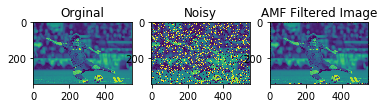

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage.util import random_noise

#path = 'C:\\Users\\Shyam\\NITK_PY_TUT\\Module3\\SDE1\\cameraman.tif '
img = cv2.imread('messi5.jpg',0) 
# img = cv2.imread('noisy_pcb',0)
# Add salt and pepper noise to the image 
noise_img = random_noise(img, mode="s&p",amount=0.2) 

img_noisy1 = np.array(255*noise_img, dtype = 'uint8')

amf_output = amf(img_noisy1, 3, 11)

# computing psnr(dB) 
noisy_psnr=psnr(img,img_noisy1) 
print(noisy_psnr)
denoised_psnr =psnr(img,amf_output) 
print(denoised_psnr)

# set up side-by-side image display 
plt.subplot(1,3,1) 
plt.imshow(img) 
plt.title('Orginal') 
plt.subplot(1,3,2) 
plt.imshow(img_noisy1) 
plt.title('Noisy') 
plt.subplot(1,3,3) 
plt.imshow(amf_output) 
plt.title('AMF Filtered Image') 
plt.show()